## Module 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = [
    'Date', 'Time', 'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3'
]

data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    na_values='?',
    names=column_names,
    header=None,
    skiprows=1,
    encoding='latin1',
    engine='python'
)
print(data.head())
print(data.shape)



         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
(162495, 9)


In [ ]:
print(data.info())
print(data.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162495 entries, 0 to 162494
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   162495 non-null  object 
 1   Time                   162495 non-null  object 
 2   Global_active_power    162486 non-null  float64
 3   Global_reactive_power  162485 non-null  float64
 4   Voltage                162485 non-null  float64
 5   Global_intensity       162485 non-null  float64
 6   Sub_metering_1         162485 non-null  float64
 7   Sub_metering_2         162485 non-null  float64
 8   Sub_metering_3         162485 non-null  float64
dtypes: float64(7), object(2)
memory usage: 11.2+ MB
None
              Date      Time  Global_active_power  Global_reactive_power  \
count       162495    162495        162486.000000          162485.000000   
unique         114      1440                  NaN                    NaN   
top     17/12/2006  1

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:0

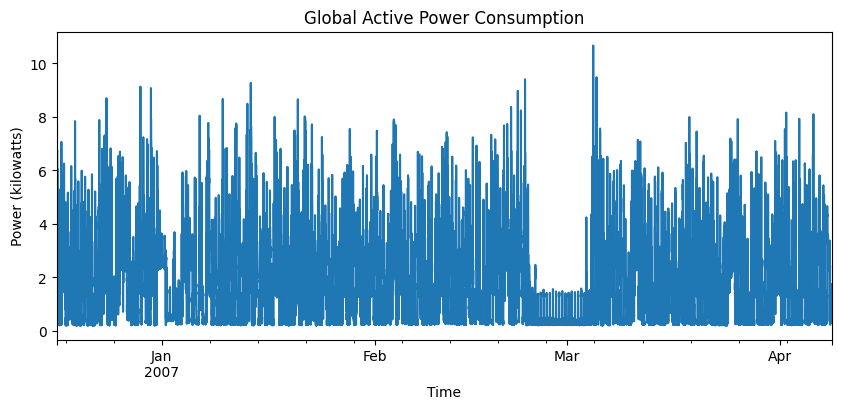

In [ ]:
data[['Date', 'Time']].isnull().sum()
data['Datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

print(data.head())
data.set_index('Datetime', inplace=True)
data['Global_active_power'].plot(figsize=(10,4))
plt.title("Global Active Power Consumption")
plt.xlabel("Time")
plt.ylabel("Power (kilowatts)")
plt.show()

##Module 2

In [ ]:
print(data.isnull().sum())
print(data.ffill(inplace=True))

Date                      0
Time                      0
Global_active_power       9
Global_reactive_power    10
Voltage                  10
Global_intensity         10
Sub_metering_1           10
Sub_metering_2           10
Sub_metering_3           10
dtype: int64
None


In [ ]:
Q1 = data['Global_active_power'].quantile(0.25)
Q3 = data['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

data = data[
    (data['Global_active_power'] >= Q1 - 1.5 * IQR) &
    (data['Global_active_power'] <= Q3 + 1.5 * IQR)
]

# Drop non-numeric columns 'Date' and 'Time' before resampling
data_numeric = data.drop(columns=['Date', 'Time'])
print(data_numeric)
hourly_data = data_numeric.resample('h').mean() # Updated: Using 'h' instead of 'H'
print(hourly_data)
daily_data = data_numeric.resample('D').mean()
print(daily_data)

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:28:00                3.666                  0.528   235.68   
2006-12-16 17:29:00                3.520                  0.522   235.02   
2006-12-16 17:30:00                3.702                  0.520   235.09   
2006-12-16 17:31:00                3.700                  0.520   235.22   
...                                  ...                    ...      ...   
2007-04-08 13:34:00                0.412                  0.000   240.67   
2007-04-08 13:35:00                0.442                  0.098   240.42   
2007-04-08 13:36:00                0.326                  0.118   240.51   
2007-04-08 13:37:00                0.328                  0.118   240.43   
2007-04-08 13:38:00                0.300                  0.118   240.43   

           

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hourly_data[['Voltage']] = scaler.fit_transform(
    hourly_data[['Voltage']]
)

print(hourly_data.head())

                     Global_active_power  Global_reactive_power   Voltage  \
Datetime                                                                    
2006-12-16 17:00:00             3.680444               0.202296  0.246754   
2006-12-16 18:00:00             3.386800               0.075709  0.223150   
2006-12-16 19:00:00             3.400233               0.085233  0.145623   
2006-12-16 20:00:00             3.268567               0.075100  0.187518   
2006-12-16 21:00:00             3.056467               0.076667  0.341673   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         15.748148             0.0        0.407407   
2006-12-16 18:00:00         14.538182             0.0        4.181818   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-16 21:00:00   

In [ ]:
train_size = int(len(hourly_data) * 0.7)
val_size = int(len(hourly_data) * 0.15)

train = hourly_data[:train_size]
val = hourly_data[train_size:train_size + val_size]
test = hourly_data[train_size + val_size:]

print("Train size:", train.shape)
print("Validation size:", val.shape)
print("Test size:", test.shape)


Train size: (1896, 7)
Validation size: (406, 7)
Test size: (407, 7)


##Module 3


In [ ]:
# Time-based features
hourly_data['hour'] = hourly_data.index.hour
hourly_data['day'] = hourly_data.index.day
hourly_data['dayofweek'] = hourly_data.index.dayofweek
hourly_data['month'] = hourly_data.index.month

print(hourly_data.head())


                     Global_active_power  Global_reactive_power   Voltage  \
Datetime                                                                    
2006-12-16 17:00:00             3.680444               0.202296  0.246754   
2006-12-16 18:00:00             3.386800               0.075709  0.223150   
2006-12-16 19:00:00             3.400233               0.085233  0.145623   
2006-12-16 20:00:00             3.268567               0.075100  0.187518   
2006-12-16 21:00:00             3.056467               0.076667  0.341673   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         15.748148             0.0        0.407407   
2006-12-16 18:00:00         14.538182             0.0        4.181818   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00         13.916667             0.0        0.000000   
2006-12-16 21:00:00   

In [ ]:
# Aggregate device-level consumption
hourly_data['total_sub_metering'] = (
    hourly_data['Sub_metering_1'] +
    hourly_data['Sub_metering_2'] +
    hourly_data['Sub_metering_3']
)

print(hourly_data[['total_sub_metering']].head())


                     total_sub_metering
Datetime                               
2006-12-16 17:00:00           17.370370
2006-12-16 18:00:00           21.054545
2006-12-16 19:00:00           18.116667
2006-12-16 20:00:00           16.783333
2006-12-16 21:00:00           17.633333


In [ ]:
# Lag feature (previous hour power usage)
hourly_data['lag_1'] = hourly_data['Global_active_power'].shift(1)
hourly_data['lag_24'] = hourly_data['Global_active_power'].shift(24)

print(hourly_data[['Global_active_power', 'lag_1', 'lag_24']].head(30))


                     Global_active_power     lag_1    lag_24
Datetime                                                    
2006-12-16 17:00:00             3.680444       NaN       NaN
2006-12-16 18:00:00             3.386800  3.680444       NaN
2006-12-16 19:00:00             3.400233  3.386800       NaN
2006-12-16 20:00:00             3.268567  3.400233       NaN
2006-12-16 21:00:00             3.056467  3.268567       NaN
2006-12-16 22:00:00             2.200133  3.056467       NaN
2006-12-16 23:00:00             2.061600  2.200133       NaN
2006-12-17 00:00:00             1.882467  2.061600       NaN
2006-12-17 01:00:00             3.176800  1.882467       NaN
2006-12-17 02:00:00             1.587267  3.176800       NaN
2006-12-17 03:00:00             1.662200  1.587267       NaN
2006-12-17 04:00:00             2.215767  1.662200       NaN
2006-12-17 05:00:00             1.996733  2.215767       NaN
2006-12-17 06:00:00             1.303300  1.996733       NaN
2006-12-17 07:00:00     

In [ ]:
# Moving averages
hourly_data['rolling_mean_3'] = hourly_data['Global_active_power'].rolling(window=3).mean()
hourly_data['rolling_mean_24'] = hourly_data['Global_active_power'].rolling(window=24).mean()

print(hourly_data[['rolling_mean_3', 'rolling_mean_24']].head(30))


                     rolling_mean_3  rolling_mean_24
Datetime                                            
2006-12-16 17:00:00             NaN              NaN
2006-12-16 18:00:00             NaN              NaN
2006-12-16 19:00:00        3.489159              NaN
2006-12-16 20:00:00        3.351867              NaN
2006-12-16 21:00:00        3.241756              NaN
2006-12-16 22:00:00        2.841722              NaN
2006-12-16 23:00:00        2.439400              NaN
2006-12-17 00:00:00        2.048067              NaN
2006-12-17 01:00:00        2.373622              NaN
2006-12-17 02:00:00        2.215511              NaN
2006-12-17 03:00:00        2.142089              NaN
2006-12-17 04:00:00        1.821744              NaN
2006-12-17 05:00:00        1.958233              NaN
2006-12-17 06:00:00        1.838600              NaN
2006-12-17 07:00:00        1.640022              NaN
2006-12-17 08:00:00        1.604633              NaN
2006-12-17 09:00:00        1.875830           

In [ ]:
# Drop rows with NaN values
final_data = hourly_data.dropna()

print(final_data.shape)
final_data.head()


(2685, 16)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,dayofweek,month,total_sub_metering,lag_1,lag_24,rolling_mean_3,rolling_mean_24
Datetime,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.406767,0.166633,0.195424,14.510000,0.0,0.466667,16.816667,17,17,6,12,17.283333,3.326033,3.680444,3.224798,2.401107
2006-12-17 18:00:00,3.609793,0.135690,0.204567,15.375862,0.0,0.000000,16.844828,18,17,6,12,16.844828,3.406767,3.386800,3.447531,2.410398
2006-12-17 19:00:00,2.908400,0.265167,0.143784,12.516667,0.0,0.516667,16.683333,19,17,6,12,17.200000,3.609793,3.400233,3.308320,2.389905
2006-12-17 20:00:00,3.361500,0.271500,0.305113,14.276667,0.0,1.116667,17.116667,20,17,6,12,18.233333,2.908400,3.268567,3.293231,2.393778
2006-12-17 21:00:00,3.040767,0.267967,0.438821,12.716667,0.0,1.200000,17.500000,21,17,6,12,18.700000,3.361500,3.056467,3.103556,2.393123


##Module 4

In [ ]:
from sklearn.model_selection import train_test_split

# Target variable
y = final_data['Global_active_power']

# Features (drop target)
X = final_data.drop(columns=['Global_active_power'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (2148, 15)
Test size: (537, 15)


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

print("Model training completed")


Model training completed


In [ ]:
# Predictions
y_pred = model.predict(X_test)

print("Sample predictions:", y_pred[:5])


Sample predictions: [0.25701777 0.61430153 1.2445177  1.7561937  1.40015239]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 0.01421492039842676
RMSE: 0.019446608274528102


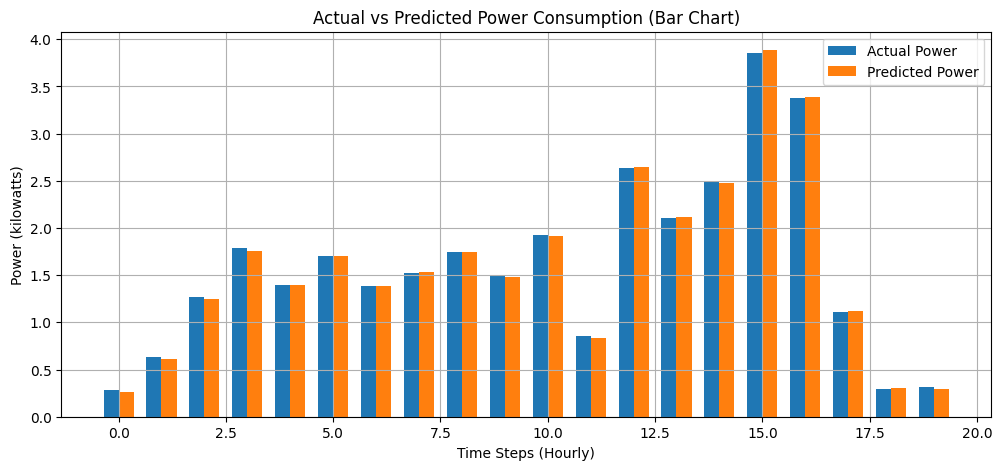

In [ ]:
# Select small sample (first 20 points)
sample_size = 20
actual_sample = y_test.values[:sample_size]
pred_sample = y_pred[:sample_size]

x = np.arange(sample_size)
width = 0.35

plt.figure(figsize=(12,5))
plt.bar(x - width/2, actual_sample, width, label='Actual Power')
plt.bar(x + width/2, pred_sample, width, label='Predicted Power')

plt.xlabel("Time Steps (Hourly)")
plt.ylabel("Power (kilowatts)")
plt.title("Actual vs Predicted Power Consumption (Bar Chart)")
plt.legend()
plt.grid(True)
plt.show()


##Module 5


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# Select target column for LSTM
lstm_data = final_data[['Global_active_power']]

# Normalize data
scaler = MinMaxScaler()
lstm_scaled = scaler.fit_transform(lstm_data)
# Create sequences
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(lstm_scaled, time_steps=24)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2661, 24, 1)
y shape: (2661, 1)


In [ ]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2128, 24, 1)
Test shape: (533, 24, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# LSTM Model Architecture
lstm_model = Sequential()

lstm_model.add(
    LSTM(
        units=50,
        activation='tanh',
        return_sequences=True,
        input_shape=(24, 1)
    )
)

lstm_model.add(Dropout(0.2))

lstm_model.add(
    LSTM(
        units=50,
        activation='tanh'
    )
)

lstm_model.add(Dense(1))

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

lstm_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = lstm_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0681 - val_loss: 0.0461
Epoch 2/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0487 - val_loss: 0.0430
Epoch 3/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0417 - val_loss: 0.0369
Epoch 4/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0318 - val_loss: 0.0273
Epoch 5/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0282 - val_loss: 0.0263
Epoch 6/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0266 - val_loss: 0.0257
Epoch 7/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0252 - val_loss: 0.0239
Epoch 8/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0241 - val_loss: 0.0243
Epoch 9/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0237 - val_loss: 0.0245
Epoch 10/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0258 - val_loss: 0.0227
Epoch 11/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0238 - val_loss: 0.0223
Epoch 12/30
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0

In [ ]:
lstm_model_tuned = Sequential([
    LSTM(64, return_sequences=True, input_shape=(24, 1)),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

lstm_model_tuned.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mse'
)

history_tuned = lstm_model_tuned.fit(
    X_train, y_train,
    epochs=40,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0657 - val_loss: 0.0466
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0494 - val_loss: 0.0401
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0387 - val_loss: 0.0308
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0296 - val_loss: 0.0274
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0276 - val_loss: 0.0253
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0259 - val_loss: 0.0245
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0243 - val_loss: 0.0268
Epoch 8/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0266 - val_loss: 0.0239
Epoch 9/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0242 - val_loss: 0.0233
Epoch 10/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0236 - val_loss: 0.0234
Epoch 11/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0235 - val_loss: 0.0229
Epoch 12/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
baseline_pred = np.mean(y_train)
baseline_predictions = np.full(shape=y_test.shape, fill_value=baseline_pred)


##Module 6

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predictions
lstm_preds = lstm_model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test)
lstm_preds_inv = scaler.inverse_transform(lstm_preds)

rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))
mae = mean_absolute_error(y_test_inv, lstm_preds_inv)
r2 = r2_score(y_test_inv, lstm_preds_inv)

print("LSTM RMSE:", rmse)
print("LSTM MAE :", mae)
print("LSTM R2  :", r2)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
LSTM RMSE: 0.6573774462271874
LSTM MAE : 0.46030000203320043
LSTM R2  : 0.5676394293734808


In [ ]:
baseline_rmse = np.sqrt(
    mean_squared_error(
        scaler.inverse_transform(y_test),
        scaler.inverse_transform(baseline_predictions)
    )
)

print("Baseline RMSE:", baseline_rmse)


Baseline RMSE: 1.001286201746457


In [ ]:
lstm_model.save("energy_lstm_model.h5")
print("LSTM model saved successfully")


LSTM model saved successfully


In [ ]:
def predict_energy_lstm(last_24_values):
    """
    last_24_values: list of last 24 Global_active_power values
    """
    values = np.array(last_24_values).reshape(-1, 1)
    values_scaled = scaler.transform(values)
    values_scaled = values_scaled.reshape(1, 24, 1)

    prediction = lstm_model.predict(values_scaled)
    return scaler.inverse_transform(prediction)[0][0]


In [ ]:
sample_input = final_data['Global_active_power'].values[-24:]
prediction = predict_energy_lstm(sample_input)

print("Predicted Next Hour Energy Consumption:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Next Hour Energy Consumption: 0.804562


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


##Module 7

In [ ]:
!pip install matplotlib seaborn


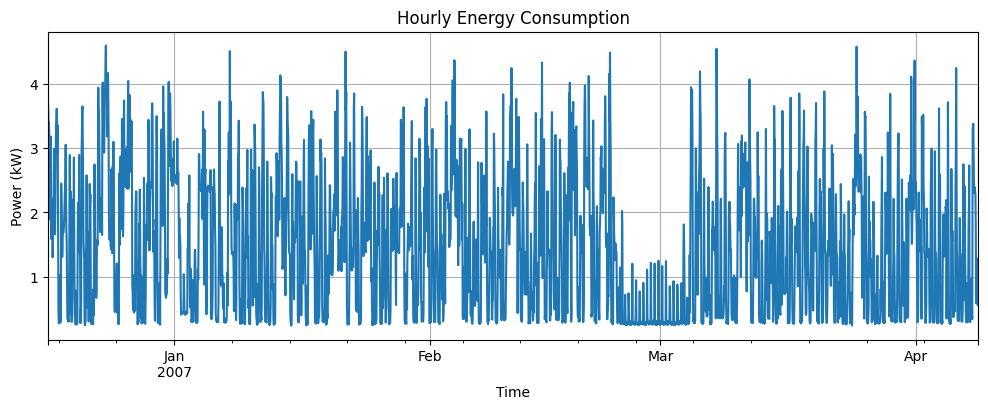

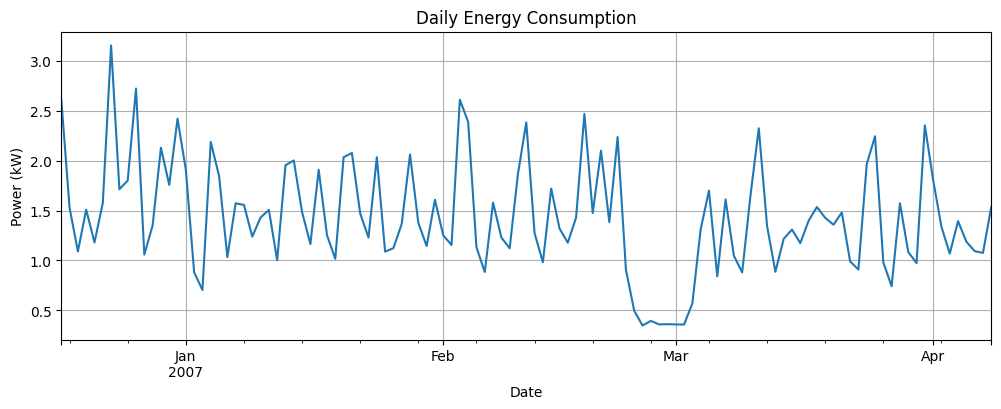

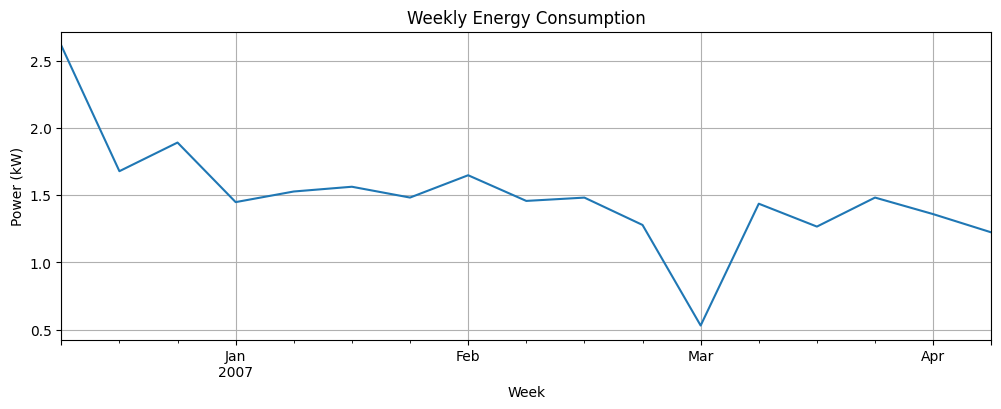

/tmp/ipython-input-3355169202.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = final_data.resample('M').mean()


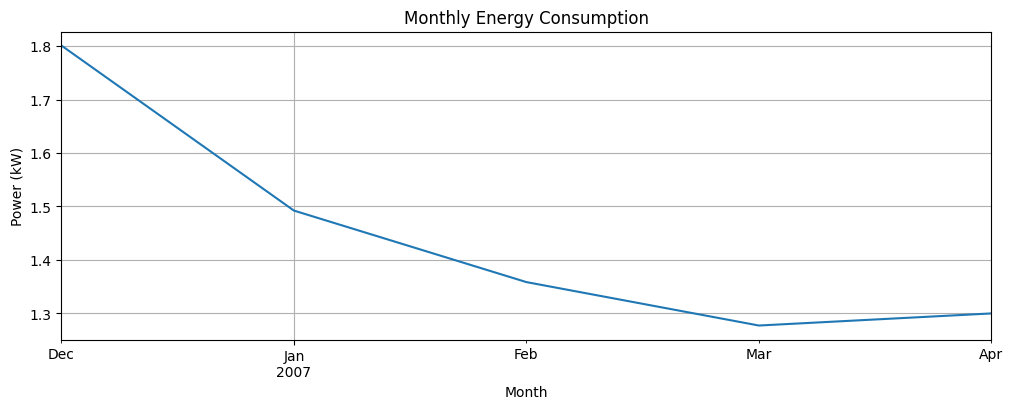

In [ ]:
import matplotlib.pyplot as plt

# Hourly Consumption
plt.figure(figsize=(12,4))
hourly_data['Global_active_power'].plot()
plt.title("Hourly Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.grid(True)
plt.show()


# Daily Consumption
daily_data = final_data.resample('D').mean()

plt.figure(figsize=(12,4))
daily_data['Global_active_power'].plot()
plt.title("Daily Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Power (kW)")
plt.grid(True)
plt.show()


# Weekly Consumption
weekly_data = final_data.resample('W').mean()

plt.figure(figsize=(12,4))
weekly_data['Global_active_power'].plot()
plt.title("Weekly Energy Consumption")
plt.xlabel("Week")
plt.ylabel("Power (kW)")
plt.grid(True)
plt.show()


# Monthly Consumption
monthly_data = final_data.resample('M').mean()

plt.figure(figsize=(12,4))
monthly_data['Global_active_power'].plot()
plt.title("Monthly Energy Consumption")
plt.xlabel("Month")
plt.ylabel("Power (kW)")
plt.grid(True)
plt.show()


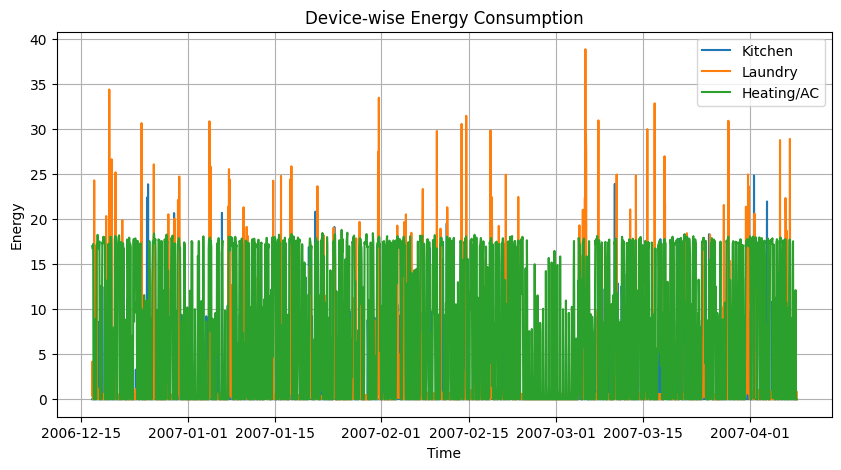

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(hourly_data['Sub_metering_1'], label='Kitchen')
plt.plot(hourly_data['Sub_metering_2'], label='Laundry')
plt.plot(hourly_data['Sub_metering_3'], label='Heating/AC')

plt.title("Device-wise Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.legend()
plt.grid(True)
plt.show()


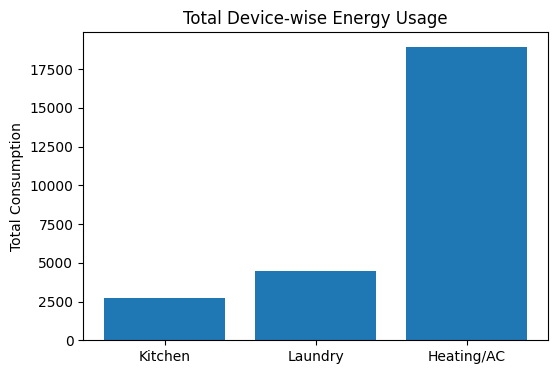

In [ ]:
device_usage = {
    "Kitchen": hourly_data['Sub_metering_1'].sum(),
    "Laundry": hourly_data['Sub_metering_2'].sum(),
    "Heating/AC": hourly_data['Sub_metering_3'].sum()
}

plt.figure(figsize=(6,4))
plt.bar(device_usage.keys(), device_usage.values())
plt.title("Total Device-wise Energy Usage")
plt.ylabel("Total Consumption")
plt.show()


In [ ]:
def energy_suggestions(current_usage):

    avg_usage = final_data['Global_active_power'].mean()

    if current_usage > avg_usage * 1.2:
        return "⚠ High energy usage detected. Consider turning off unused appliances."

    elif current_usage < avg_usage * 0.8:
        return "✅ Energy usage is efficient. Keep it up!"

    else:
        return "ℹ Energy usage is within normal range."


# Example usage
latest_usage = final_data['Global_active_power'].iloc[-1]
print("Current Usage:", latest_usage)
print("Suggestion:", energy_suggestions(latest_usage))


Current Usage: 0.5535897435897436
Suggestion: ✅ Energy usage is efficient. Keep it up!


##Module 8


In [ ]:
!pip install flask flask-ngrok


In [ ]:
lstm_model.save("energy_lstm_model.h5")
